# Lab 5 层次聚类

## 实验要求
- 数据集 2000 个样例，每个样例的前 3 列表示特征，第 4 列表示标签
- 基本要求(4’)：绘制聚类前后样本分布情况
    -  实现 single-linkage 层次聚类算法；
    - 实现 complete-linkage 层次聚类算法。
- 中级要求(1’)：实现 average-linkage 层次聚类算法，绘制样本分布图。
- 提⾼要求(1’)：对⽐上述三种算法，给出结论。
- 拓展要求：通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析。


发送邮箱：2120230658@mail.nankai.edu.cn

In [1]:
# 引入头文件
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import adjusted_rand_score

In [2]:
# Load Data

data_file_path = 'data.dat'
label_file_path = 'label.dat'

data = pd.read_csv(data_file_path, header=None, delim_whitespace=True)
labels = pd.read_csv(label_file_path, header=None, delim_whitespace=True)

data.head(), labels.head()

(          0         1         2
 0  2.080957  5.841362  4.929697
 1  0.296014  3.175925  4.145915
 2  2.164914  6.197920  7.737439
 3  1.457204  1.224453  0.702150
 4  2.061224  4.739729  7.969272,
      0
 0  2.0
 1  1.0
 2  3.0
 3  0.0
 4  3.0)

# 基础知识
层次聚类（Hierarchical Clustering）是一种常用的数据聚类方法，广泛应用于数据分析、生物信息学、图像分析等领域。它的主要特点是不需要预先指定聚类的数量，而是通过构建一个层次化的树状结构来组织数据。层次聚类分为两种主要类型：凝聚型（Agglomerative）和分裂型（Divisive）。

### 凝聚型层次聚类
1. **起始状态**：将每个数据点视为一个单独的聚类。
2. **合并步骤**：在每一步中，寻找最接近的两个聚类并将它们合并，形成一个新的聚类。
3. **迭代过程**：重复合并步骤，直到所有数据点都被合并到一个单独的聚类中，或达到某个停止条件。
4. **距离度量**：使用不同的距离度量来确定聚类间的“接近程度”，如欧几里得距离、曼哈顿距离、最大距离等。

### 分裂型层次聚类
1. **起始状态**：将所有数据点视为一个整体聚类。
2. **分裂步骤**：在每一步中，将一个聚类分裂成两个更小的聚类。
3. **迭代过程**：重复分裂步骤，直到每个聚类只包含一个数据点，或达到某个停止条件。

### 层次聚类的特点
- **不需预先指定聚类数**：与K-means等方法不同，层次聚类不需要预先指定聚类的数量。
- **可视化为树状图（Dendrogram）**：层次聚类的结果通常通过树状图表示，展示了数据点是如何逐步合并或分裂的。
- **灵活性**：通过改变距离度量或合并/分裂准则，可以适应不同的应用场景。
- **计算复杂度**：特别是凝聚型层次聚类，其计算复杂度较高，不适合大规模数据集。

### 应用场景
层次聚类适用于那些需要详细了解数据结构的场景，特别是当数据集不是非常大，且不需要高度优化的性能时。例如，在生物信息学中，层次聚类被用来分析基因表达数据。

# 基础要求

### Single-Linkage 层次聚类算法

#### 介绍
Single-Linkage，也称为最近邻层次聚类，是凝聚型层次聚类的一种。它的核心思想是在每一步合并距离最近的两个聚类。

#### 工作原理
1. **初始状态**：每个数据点作为一个独立的聚类。
2. **距离计算**：计算所有聚类对之间的最小距离。这里的“最小距离”是指任意两个聚类中最近的一对数据点之间的距离。
3. **合并聚类**：选择距离最近的聚类对进行合并。
4. **重复过程**：重复以上步骤，直到所有数据点都被合并到一个聚类中，或达到某个停止条件。

#### 特点
- **链式效应**：Single-Linkage倾向于产生所谓的“链式效应”，其中聚类可以非常长和瘦，因为只考虑了最近的邻居。
- **对噪声和异常值敏感**：由于只考虑最近的点，因此对噪声和异常值非常敏感。
- **适用于识别非球形聚类**：能够识别出非标准形状的聚类。

### Complete-Linkage 层次聚类算法

#### 介绍
Complete-Linkage，也称为最远邻层次聚类，同样是凝聚型层次聚类的一种。不同于Single-Linkage，它考虑的是聚类对之间最远的点的距离。

#### 工作原理
1. **初始状态**：每个数据点作为一个独立的聚类。
2. **距离计算**：计算所有聚类对之间的最大距离。这里的“最大距离”是指任意两个聚类中最远的一对数据点之间的距离。
3. **合并聚类**：选择距离最近的聚类对进行合并。
4. **重复过程**：重复以上步骤，直到所有数据点都被合并到一个聚类中，或达到某个停止条件。

#### 特点
- **更紧凑的聚类**：Complete-Linkage倾向于产生更紧凑和更等同大小的聚类，因为它考虑了聚类间最远的点。
- **对噪声和异常值相对不敏感**：与Single-Linkage相比，Complete-Linkage对噪声和异常值不太敏感。
- **可能错过非球形聚类**：由于其紧凑性的特点，Complete-Linkage可能不会很好地识别非球形的聚类。

### 总结
Single-Linkage和Complete-Linkage都是层次聚类方法，但它们在处理数据时的策略不同，导致它们在聚类的形状和对异常值的敏感性上存在差异。选择哪种方法取决于数据的性质和分析的具体需求。

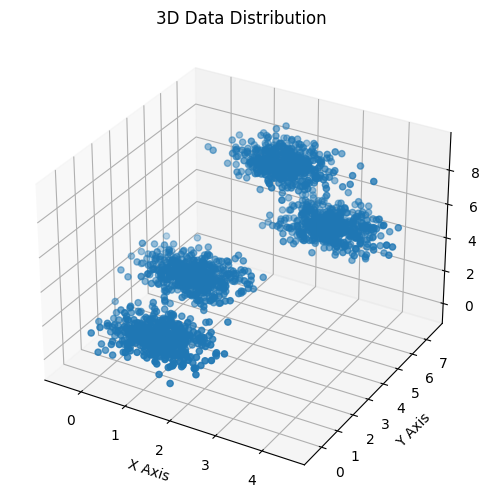

In [3]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制三维散点图
ax.scatter(data[0], data[1], data[2])

# 设置坐标轴标签
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# 设置图形标题
ax.set_title('3D Data Distribution')

# 显示图形
plt.show()

In [17]:
def hierarchical_clustering(data, method='single',num_cluster = 5, true_labels=None):
    # Step 1: Initialize the distance matrix D
    pairwise_distances = pdist(data)
    distance_matrix = squareform(pairwise_distances)
    np.fill_diagonal(distance_matrix, np.inf)

    num_samples = data.shape[0]
    current_cluster_index = num_samples
    clusters = {i: [i] for i in range(num_samples)}
    linkage_matrix = []

    while len(clusters) > 1:
        # Step 2: Find the two closest clusters
        min_dist, closest_pair = float('inf'), None
        for i in clusters:
            for j in clusters:
                if i < j:
                    dist = float('inf')
                    aver = 0
                    max_dist = 0
                    cnt = 0
                    for ii in clusters[i]:
                        for jj in clusters[j]:
                            if dist > distance_matrix[ii][jj] and method == 'single':
                                dist = distance_matrix[ii][jj]
                            elif max_dist < distance_matrix[ii][jj] and method == 'complete':
                                max_dist = distance_matrix[ii][jj]
                            else:
                                aver = aver + distance_matrix[ii][jj]
                                cnt = cnt + 1
                    if method == 'complete':
                        dist = max_dist
                    elif method == 'average':
                        dist = aver/cnt
                    if dist < min_dist:
                        min_dist = dist
                        closest_pair = (i, j)

        # Step 3: Merge the two closest clusters
        i, j = closest_pair

        # 创建一个新的聚类索引
        new_cluster_index = current_cluster_index
        current_cluster_index += 1

        # 合并聚类
        new_cluster = clusters[i] + clusters[j]
        linkage_matrix.append([i, j, min_dist, len(new_cluster)])

        # 更新聚类信息
        clusters[new_cluster_index] = new_cluster
        del clusters[i]
        del clusters[j]
        if len(clusters) <= num_cluster:
            fig = plt.figure(figsize=(8, 6))
            ax = fig.add_subplot(111, projection='3d')
            for cluster_id, points in clusters.items():
                cluster_points = data[points]
                ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster_id}')
            ax.set_title(f'Clustering Step with {num_cluster} Clusters')
            ax.set_xlabel('X Axis')
            ax.set_ylabel('Y Axis')
            ax.set_zlabel('Z Axis')
            plt.legend()
            plt.show() 

            if len(clusters) > 1:
                labels = [0] * data.shape[0]
                for cluster_id, points in clusters.items():
                    for point in points:
                        labels[point] = cluster_id
                silhouette_avg = silhouette_score(data, labels)
                davies_bouldin = davies_bouldin_score(data, labels)
                calinski_harabasz = calinski_harabasz_score(data, labels)

                print(f"Silhouette Coefficient: {silhouette_avg}")
                print(f"Davies-Bouldin Index: {davies_bouldin}")
                print(f"Calinski-Harabasz Index: {calinski_harabasz}")

        
    return np.array(linkage_matrix)

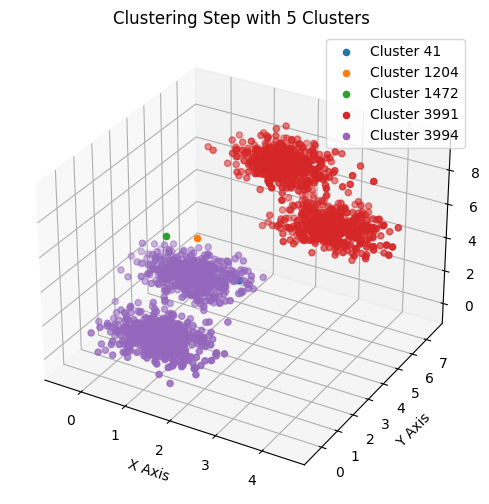

Silhouette Coefficient: 0.2762371776822935
Davies-Bouldin Index: 0.5819844422918372
Calinski-Harabasz Index: 1603.0901781618484


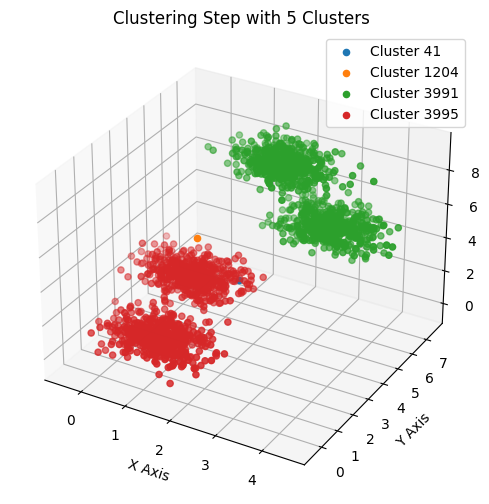

Silhouette Coefficient: 0.2774754417021129
Davies-Bouldin Index: 0.5992568688158311
Calinski-Harabasz Index: 2134.106022216707


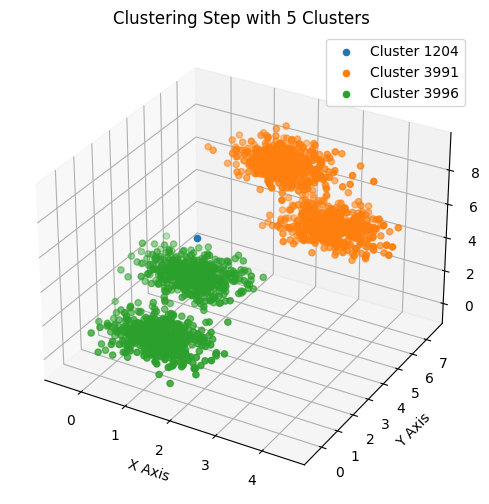

Silhouette Coefficient: 0.335375716250481
Davies-Bouldin Index: 0.5294171548259262
Calinski-Harabasz Index: 3198.857644947187


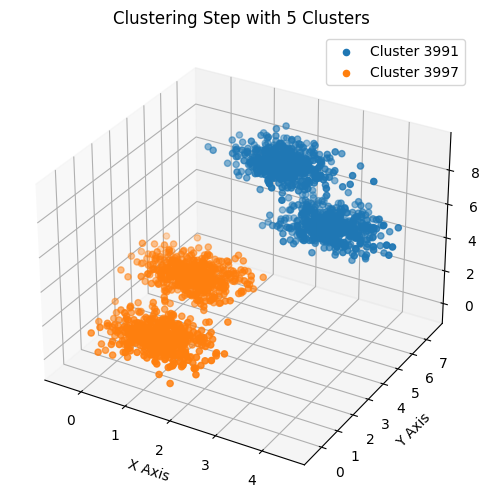

Silhouette Coefficient: 0.6530953293723047
Davies-Bouldin Index: 0.5374684382250136
Calinski-Harabasz Index: 6387.545027442159


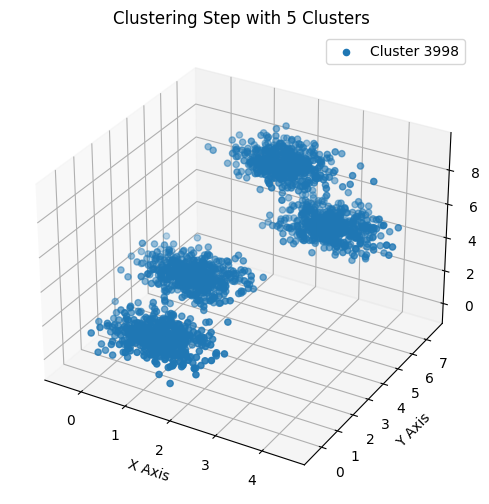

In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

linkage_matrix = hierarchical_clustering(data.values, method='single' ,num_cluster=5,true_labels=labels)

In [ ]:
linkage_matrix

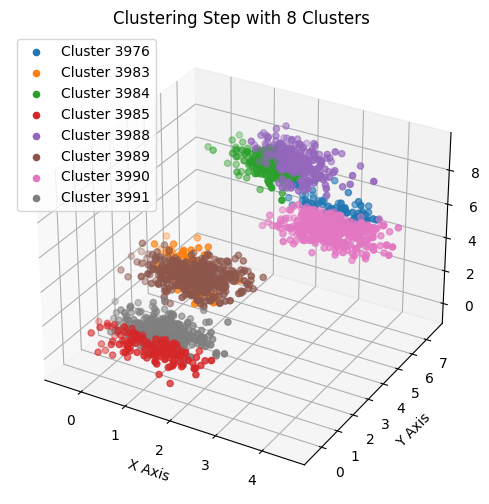

Silhouette Coefficient: 0.1701024906725462
Davies-Bouldin Index: 1.7992250128343585
Calinski-Harabasz Index: 5362.41601095891


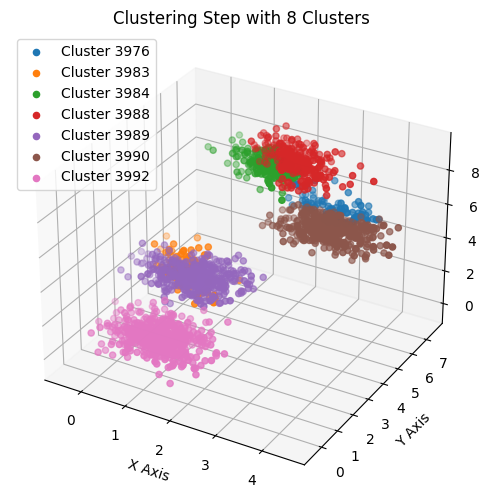

Silhouette Coefficient: 0.2789954610244695
Davies-Bouldin Index: 1.6031686505391893
Calinski-Harabasz Index: 5956.017629528648


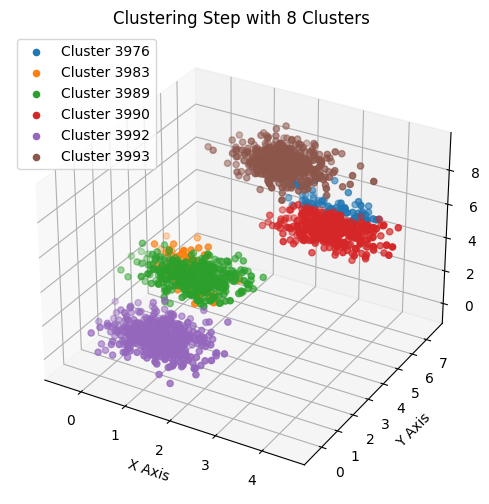

Silhouette Coefficient: 0.3804127775726438
Davies-Bouldin Index: 1.352920052698438
Calinski-Harabasz Index: 6800.686948461936


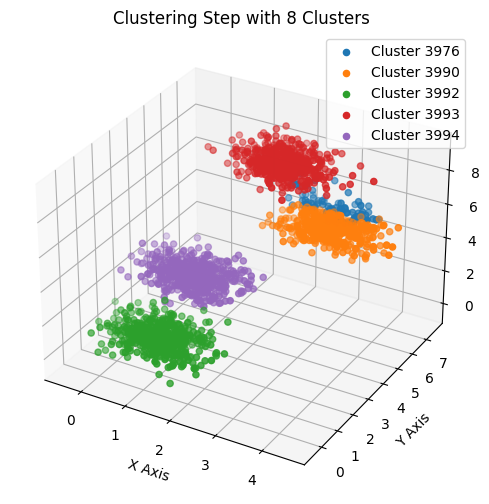

Silhouette Coefficient: 0.4992497220729505
Davies-Bouldin Index: 0.9527708857294677
Calinski-Harabasz Index: 8263.607119263404


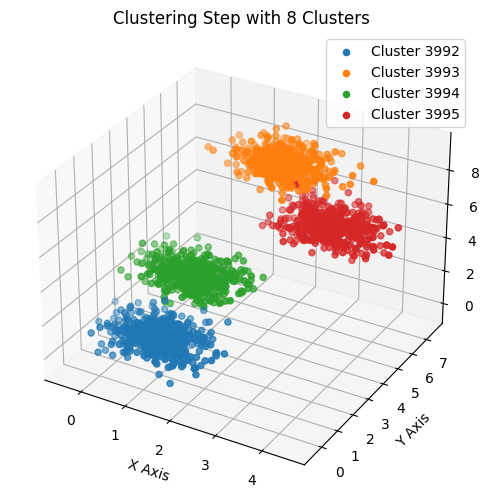

Silhouette Coefficient: 0.6308278499794413
Davies-Bouldin Index: 0.5315221543762674
Calinski-Harabasz Index: 10486.019551506004


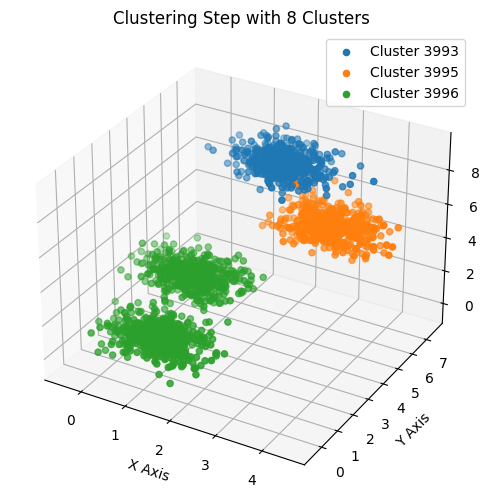

Silhouette Coefficient: 0.6251287212637399
Davies-Bouldin Index: 0.48721583539457053
Calinski-Harabasz Index: 6165.823821925979


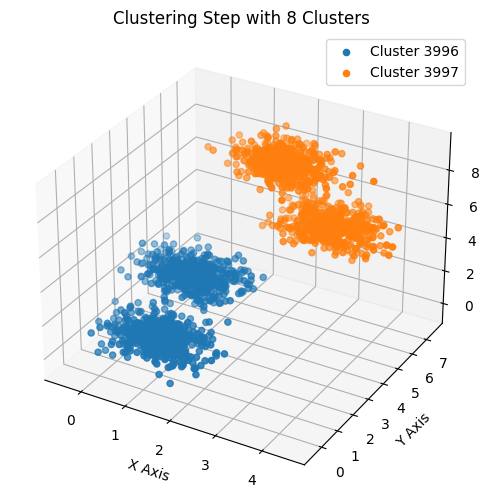

Silhouette Coefficient: 0.6530953293723047
Davies-Bouldin Index: 0.5374684382250136
Calinski-Harabasz Index: 6387.545027442159


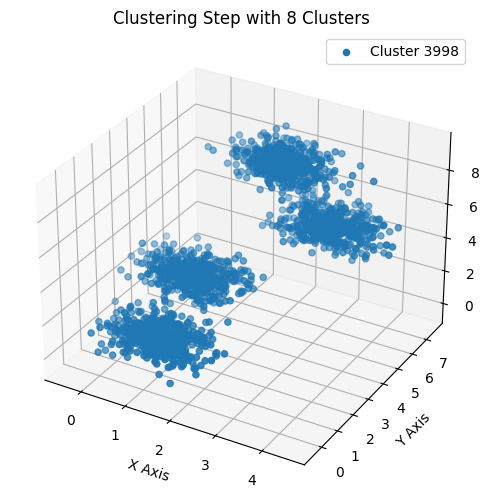

In [14]:
linkage_matrix = hierarchical_clustering(data.values, method='complete' ,num_cluster=8)

## 结果分析

我们可以看到上面是实现了single-link以及complete-link的代码，我们可以看到对于单链而言，其性质相当不好，不好的原因在于他仅仅是选取了cluster集合中距离最近的点作为集合和集合之间的距离，这样做是相当不完备也不准确的，我们可以看到，在cluster=5的时候，分类可以说是相当不好，聚类的效果显而易见不好，这就是因为他是采用了类似于贪心的策略，对于集合和集合之间的距离测算的相当不准确，这就导致了明明不是同一个聚簇的样本会被聚集到同一个类别中，而那些本应该在某一个聚簇中的样本却单独的出现了


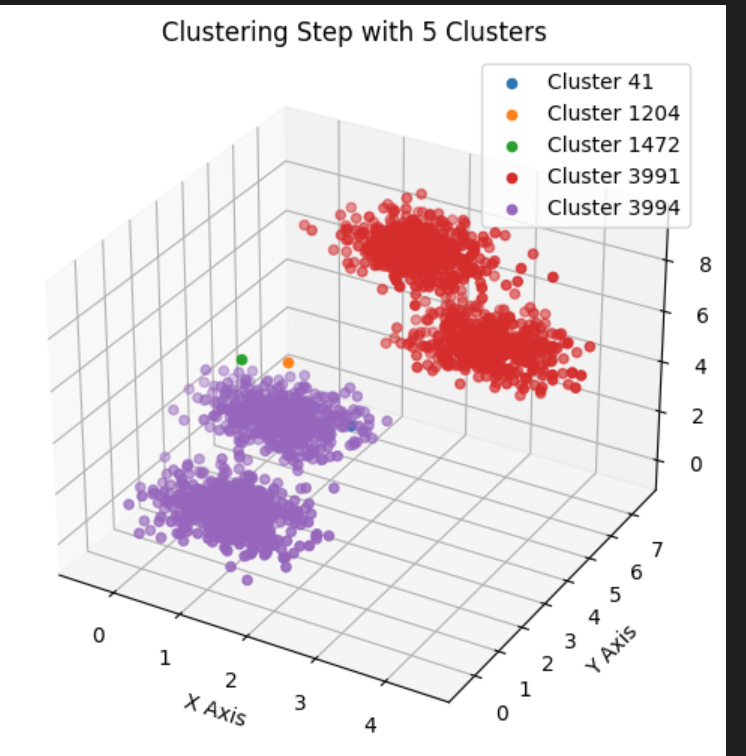


我们看到全连接，全连接是找到集合之中距离最远的那个，相对而言也不是很精确，但是相较于单连接而言也好了很多了，我们可以看到从8个聚簇到1个聚簇整体的分析过程，可以看到的是，在cluster=4的时候，分类的相当漂亮，最起看起来码有一个明确的决策边界了，这个要比上面的单链接好很多，不过从聚类的过程我们可以发现，仍然不是循序渐进的，也存在一些问题，所以最好的仍然是average-link方案。

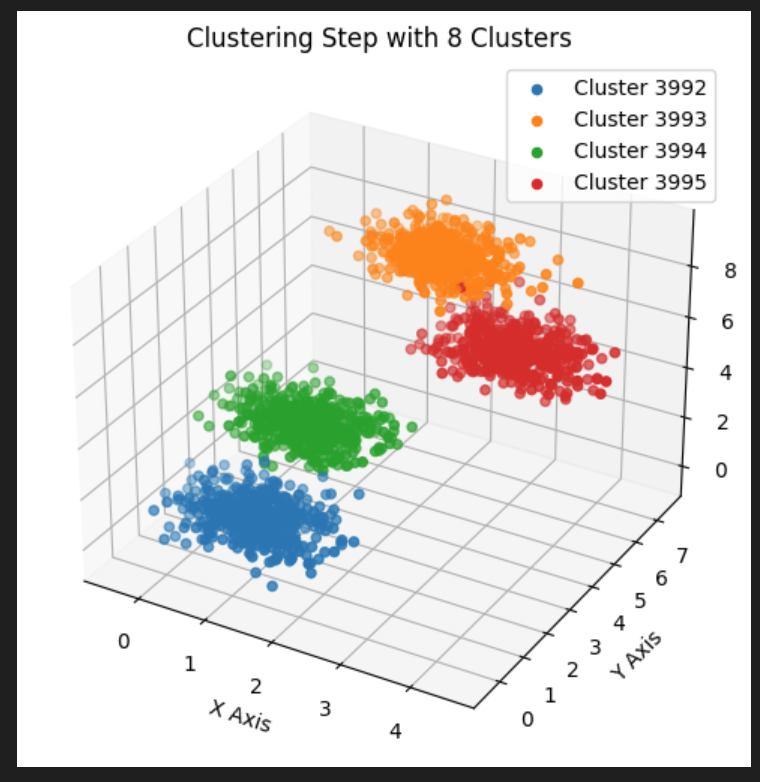

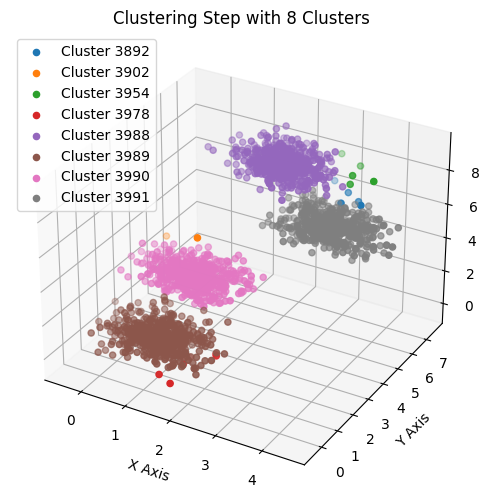

Silhouette Coefficient: 0.3430720842311398
Davies-Bouldin Index: 0.8454575583315264
Calinski-Harabasz Index: 4686.452825524774


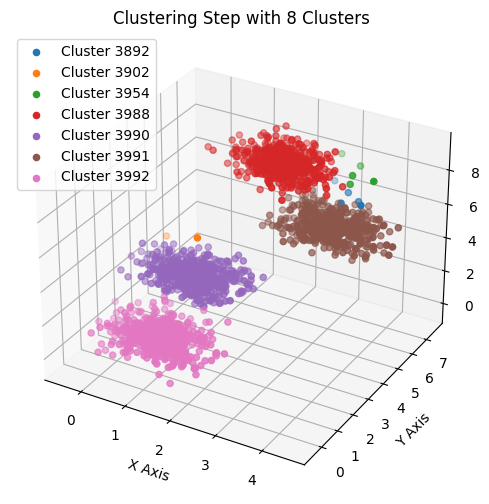

Silhouette Coefficient: 0.4187305273239617
Davies-Bouldin Index: 0.7383498116369293
Calinski-Harabasz Index: 5411.958183928726


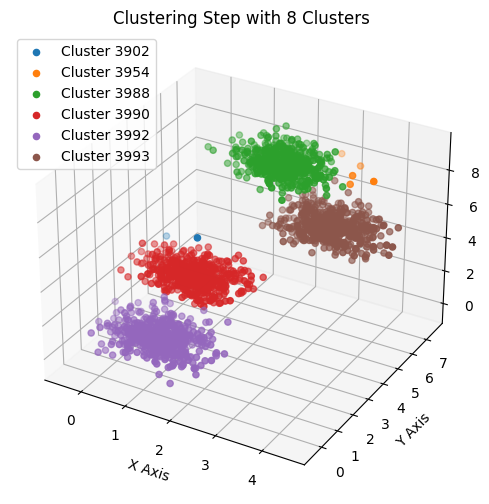

Silhouette Coefficient: 0.5014432853573021
Davies-Bouldin Index: 0.6720457446174151
Calinski-Harabasz Index: 6445.693909596987


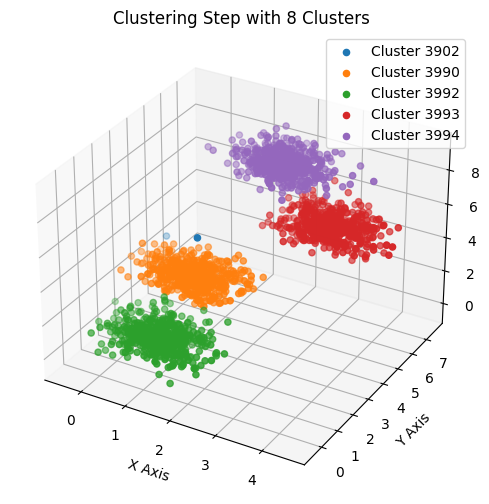

Silhouette Coefficient: 0.5798952032765062
Davies-Bouldin Index: 0.5658464855253704
Calinski-Harabasz Index: 7994.086130011967


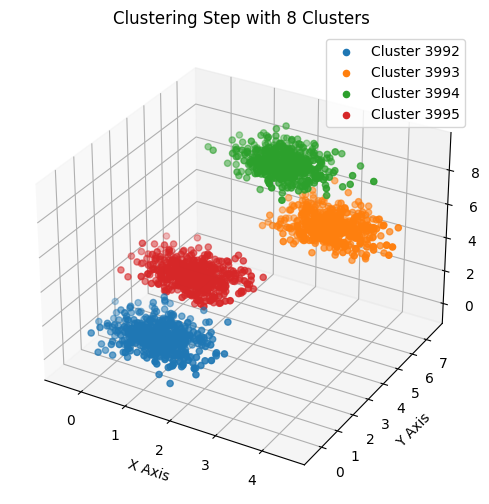

Silhouette Coefficient: 0.6337720856681929
Davies-Bouldin Index: 0.529349929919193
Calinski-Harabasz Index: 10612.45377597838


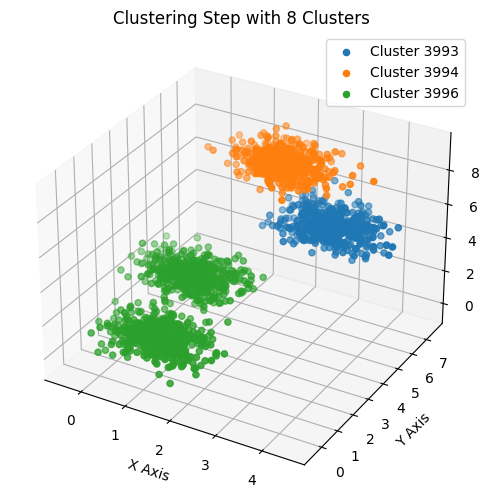

Silhouette Coefficient: 0.6276432941886685
Davies-Bouldin Index: 0.4832529728656115
Calinski-Harabasz Index: 6202.802197724021


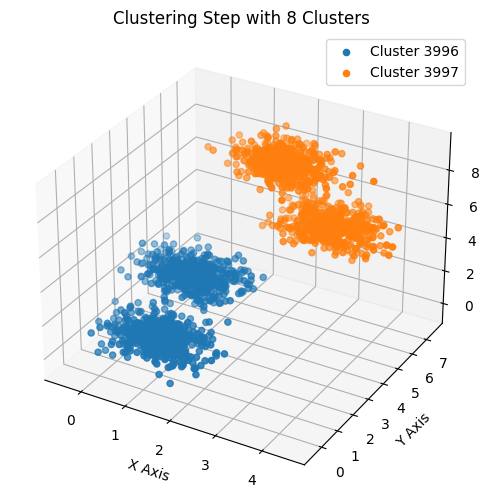

Silhouette Coefficient: 0.6530953293723047
Davies-Bouldin Index: 0.5374684382250136
Calinski-Harabasz Index: 6387.545027442159


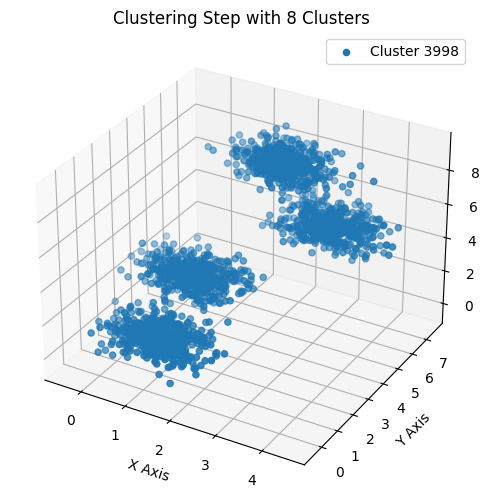

In [15]:
linkage_matrix = hierarchical_clustering(data.values, method='average' ,num_cluster=8)

# 结果分析

我们可以看到，对于全连接而言，他的合并过程更加类似于“两个势均力敌的国家打架，然后吞并”的过程，也就是说，在时间步i+1合并的两个cluster，他们的大小是接近的，而对于average-link而言，其像是“大国逐渐吞并小国”的过程，也就是说，在时间步i+1出合并的两个聚簇，一个明显很大，一个很小，那么在上面的例子中，我们可以看到，对于全连接而言，在cluster=8的时候，我们是没有办法看到清晰的四个类别的，也就是说，他的准确率很差，但是对于average-link，哪怕是在cluster=8，也有很清晰的决策边界，我们可以看到，大部分的数据点都是分类正确的，只有少量边界点是不同的。

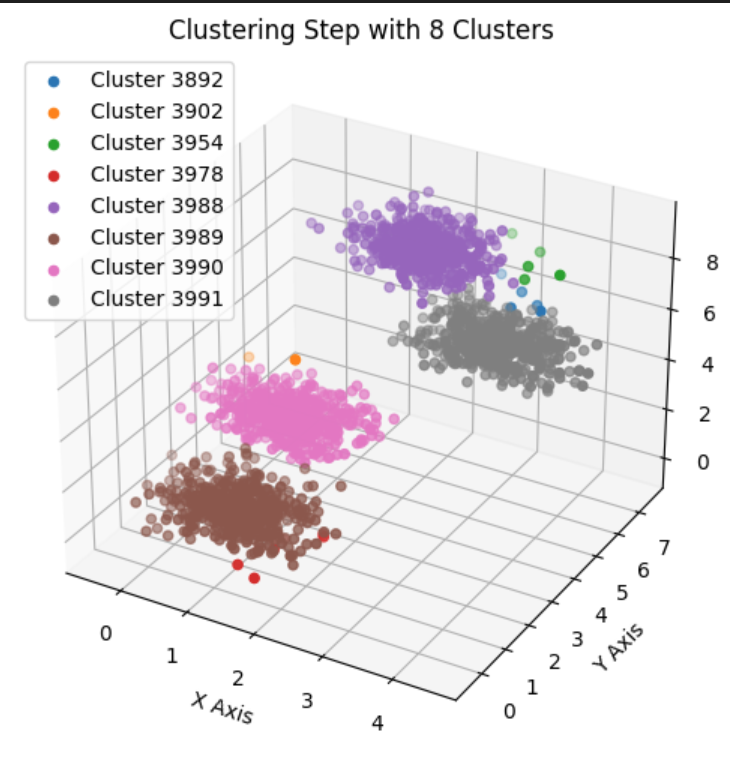

## 数据层面分析：
要评估层次聚类的效果，可以使用几种常见的性能评价指标。这些指标帮助我们了解聚类的质量，比如聚类的紧密程度和分离程度。以下是一些常用的指标：

轮廓系数 (Silhouette Coefficient)：这是一种衡量聚类性能的指标，它结合了聚类的紧密度和分离度。轮廓系数的值介于-1到1之间，接近1的值表示聚类效果好，接近-1的值表示聚类效果差。

戴维斯-布尔丁指数 (Davies-Bouldin Index)：这个指标是通过计算每个聚类与其最近聚类之间的相似度来评估聚类的。较低的戴维斯-布尔丁指数分数表示更好的聚类分离。

Calinski-Harabasz Index：也称为方差比标准，它是基于聚类内部和聚类之间的方差来评估聚类效果的。较高的Calinski-Harabasz分数通常表示聚类效果更好。

在上面我们已经计算出了具体的数据，我们在这里给出具体的分析以及整理后的数据图：
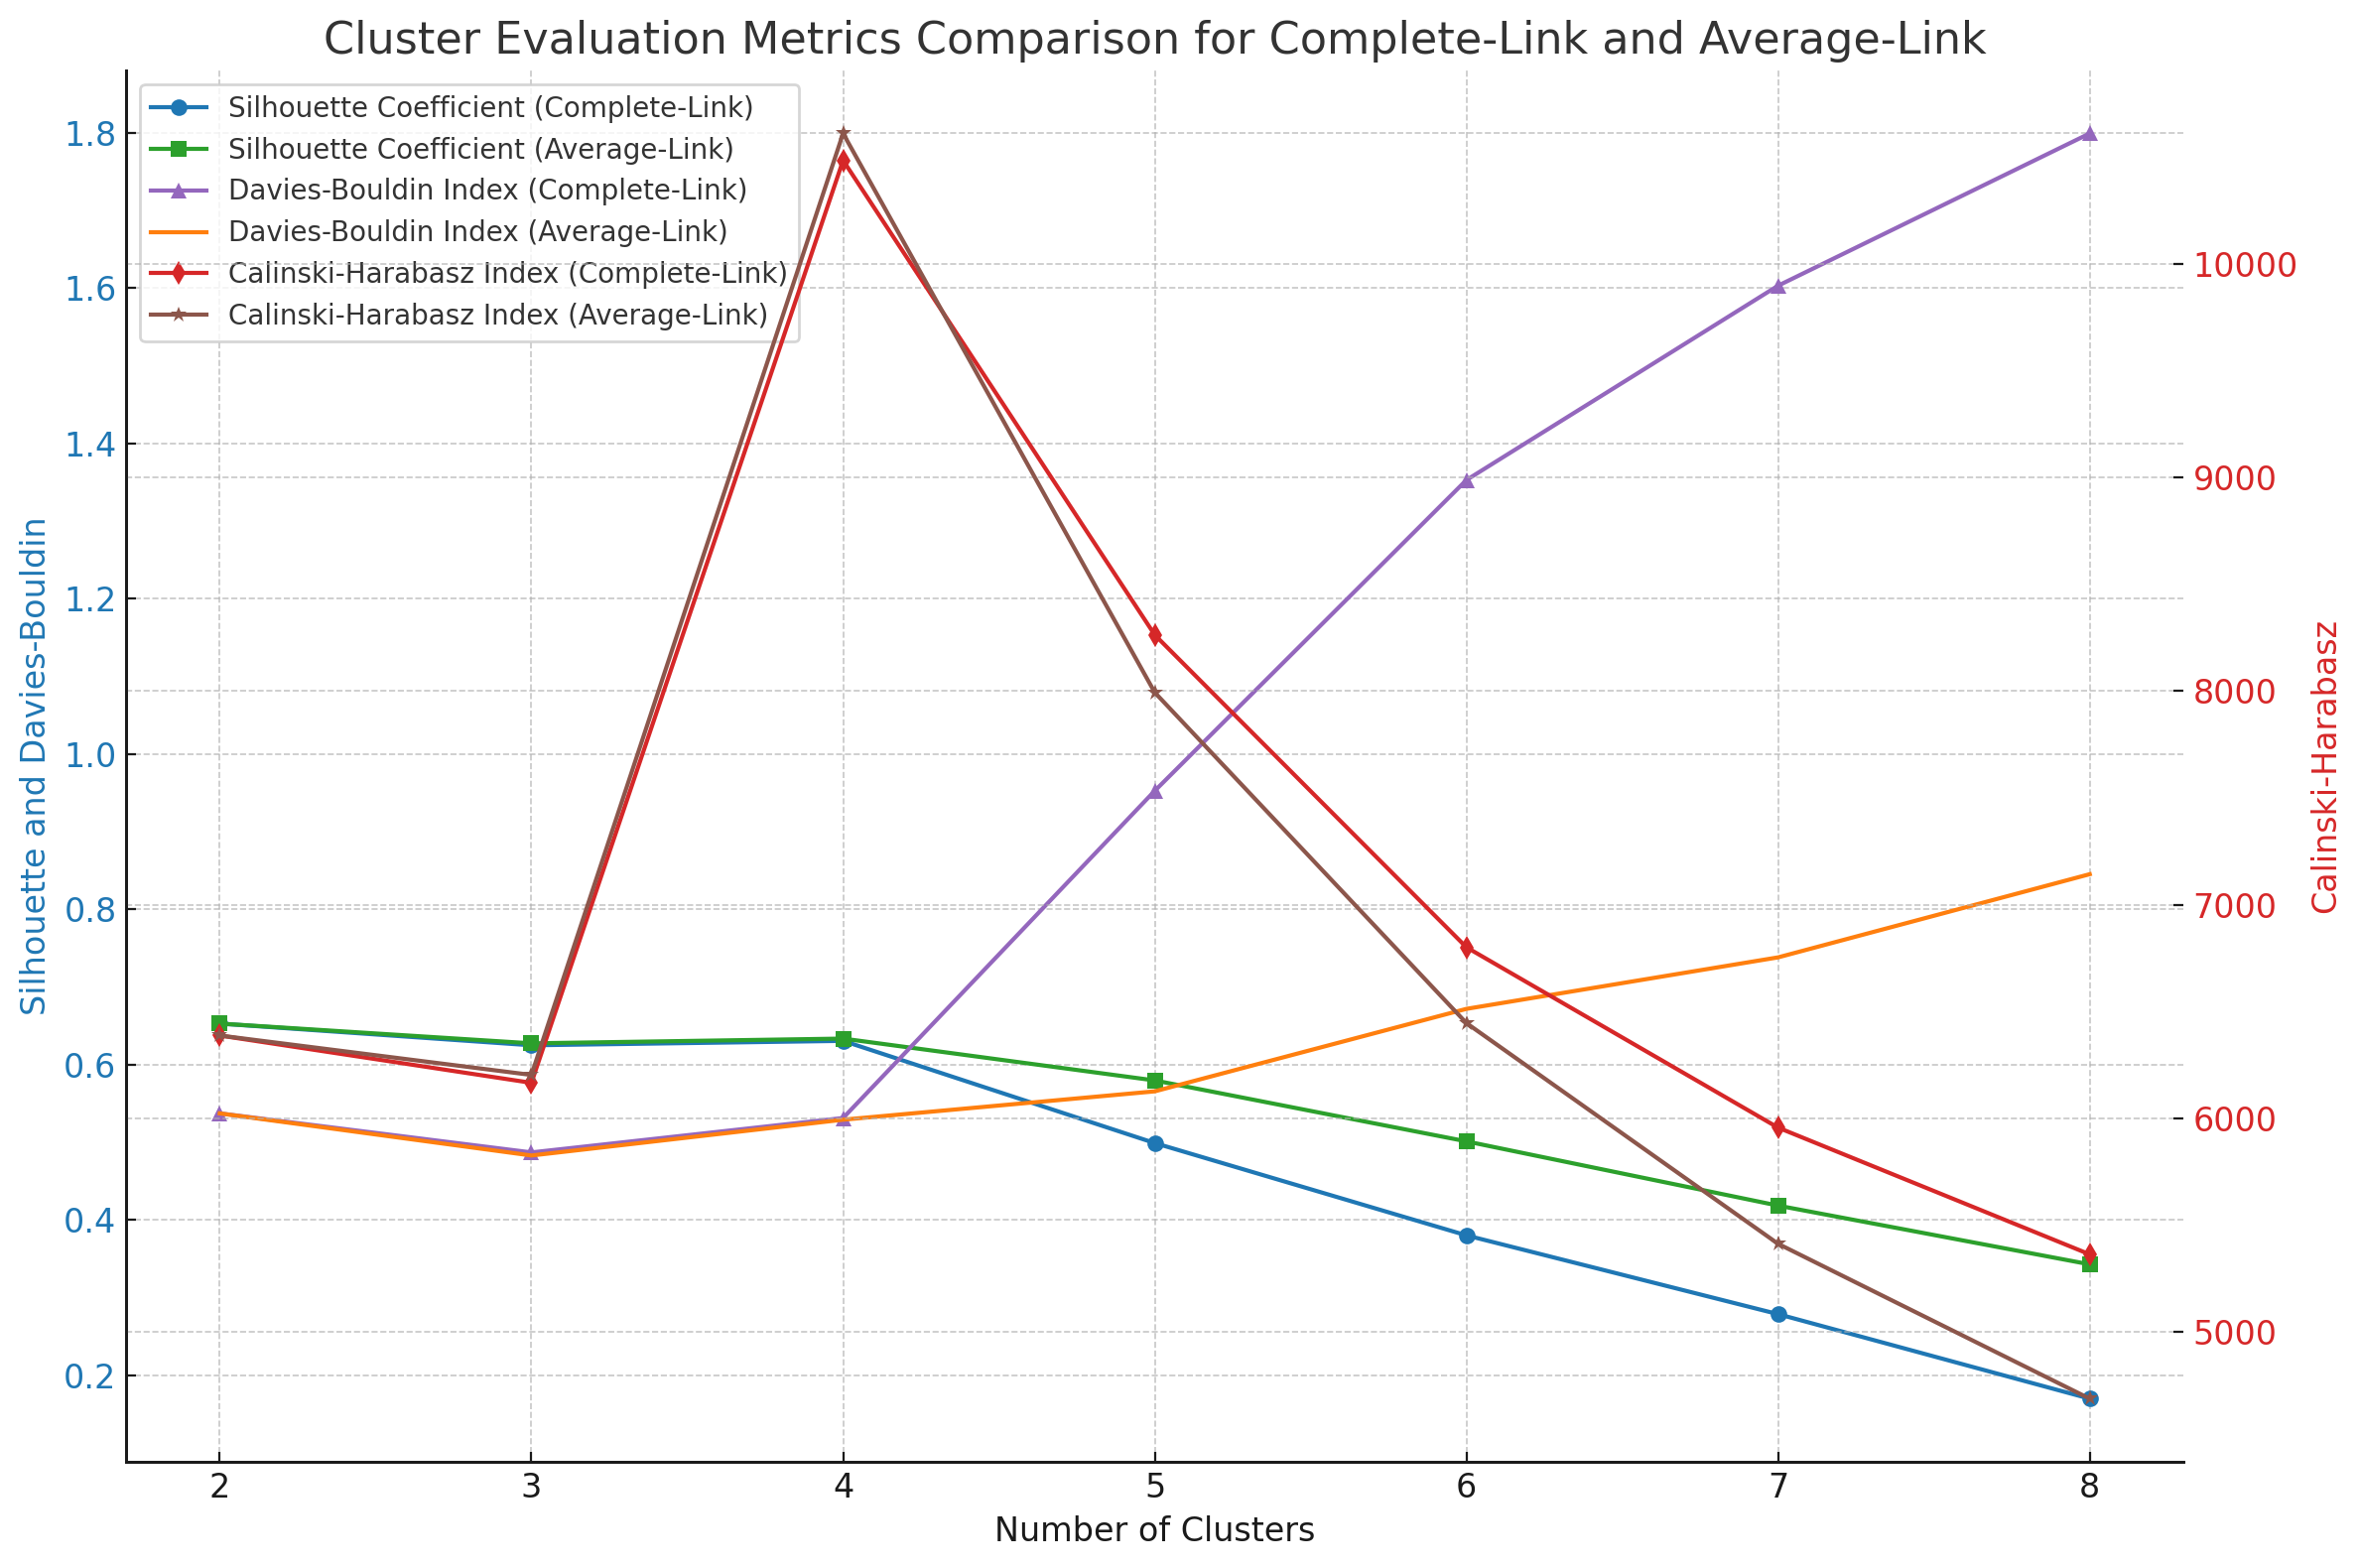


数据分析结果
- 轮廓系数：

在大多数情况下，平均连接（Average-Link）方法的轮廓系数高于完全连接（Complete-Link），表明平均连接方法在聚类的紧凑性和分离性上表现更好。对于两种方法，轮廓系数都随着聚类数量的减少而增加，表明较少的聚类数量可以提供更明显的群组边界。

- 戴维斯-布尔丁指数：

平均连接方法的戴维斯-布尔丁指数普遍低于完全连接，这表示平均连接方法在聚类的分离性上表现更好。对于两种方法，这个指数随着聚类数量的减少而减小，符合轮廓系数的趋势。

- Calinski-Harabasz指数：

对于这个指数，两种方法的表现相近，但在某些聚类数量下，完全连接的表现略好于平均连接；这个指数在聚类数量减少时呈现出一定的波动，这可能反映了不同数量的聚类对于群组内部和群组间方差的不同影响。

总的来说，平均连接方法在轮廓系数和戴维斯-布尔丁指数上表现更佳，这表明它在聚类的紧凑性和分离性上可能更优。然而，在Calinski-Harabasz指数方面，两种方法的表现相对接近，可能因具体数据和聚类数量的不同而有所变化。在选择适当的聚类方法和聚类数量时，应根据具体的应用场景和这些指标的综合考虑